<a href="https://colab.research.google.com/github/MateusFauri/TensorFlow-/blob/main/Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
  *  https://github.com/mrdbourke/tensorflow-deep-learning

  Site for learning and training:

  * https://poloclub.github.io/cnn-explainer/


In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#unzip
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2023-02-23 12:15:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.193.128, 173.194.194.128, 173.194.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.193.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   161MB/s    in 0.7s    

2023-02-23 12:15:01 (161 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*") ]))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os

def view_random_image(target_dir, target_class):
  target_folder = target_dir  + target_class
  
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape} ")

  return img

Image shape: (384, 512, 3) 


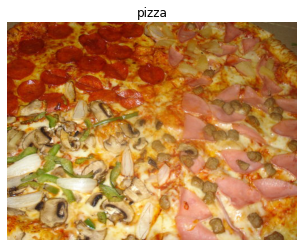

In [ ]:
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

## Normalization data
 

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

train_data = train_datagen.flow_from_directory(directory= train_dir,
                                               batch_size = 32,
                                               target_size = (224,224),
                                               class_mode = "binary",
                                               seed = 42)

valid_data = valid_datagen.flow_from_directory(directory = test_dir,
                                              batch_size = 32,
                                              target_size = (224,224),
                                              class_mode = "binary",
                                              seed = 42)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size = 3,
                           activation = "relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation = "relu"),
    tf.keras.layers.MaxPool2D( pool_size = 2, padding = "valid"),

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

history = model.fit(train_data, 
                    epochs=5, 
                    steps_per_epoch=len(train_data),
                    validation_data = valid_data,
                    validation_steps= len(valid_data),
                    verbose=1)


Epoch 1/5
47/47 [==============================] - 43s 480ms/step - loss: 0.5821 - accuracy: 0.6907 - val_loss: 0.4281 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 12s 243ms/step - loss: 0.4451 - accuracy: 0.7947 - val_loss: 0.3600 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 21s 442ms/step - loss: 0.4003 - accuracy: 0.8300 - val_loss: 0.3583 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 18s 379ms/step - loss: 0.3612 - accuracy: 0.8420 - val_loss: 0.3147 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 15s 323ms/step - loss: 0.3112 - accuracy: 0.8680 - val_loss: 0.3144 - val_accuracy: 0.8780


In [ ]:
len(train_data)

47

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [ ]:
def plot_loss_curves(history):
  """
    Returns separate loss curves for traning and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  plt.plot(epochs, loss, label = "raning_loss")
  plt.plot(epochs, val_loss, label = "val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label = "accuracy")
  plt.plot(epochs, val_accuracy, label = "val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

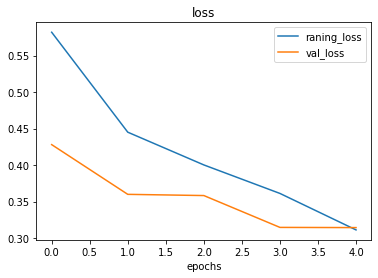

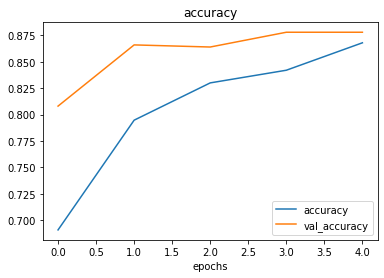

In [ ]:
plot_loss_curves(history)

# Adjust the model parametres

Fitting a machine learning model comes in 3 steps:

1.   Create a baseline
2.   Beat the baseline by overfitting a larger model
3.   Reduce overfitting

Ways to induce overfitting:

*   Increse the number of conv layers
*   Increse the number of conv filters
*   Add another dense layer to the output our flattened layer

Ways to reduce overfitting:

*   Add data augmentation
*   Add regularization layers ( such as MaxPool2D)
*   Add more data





In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import  Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Sequential

train_datagen_augmented = ImageDataGenerator(rescale= 1/255.,
                                             horizontal_flip= True,
                                             vertical_flip = True,
                                             rotation_range=0.5,
                                             width_shift_range=0.2,
                                             zoom_range=0.3)

IMG_SHAPE = (224,224)
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                         target_size=IMG_SHAPE,
                                                         class_mode="binary",
                                                         seed = 42)

Found 1500 images belonging to 2 classes.


In [ ]:
model_augmentation = Sequential([
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

model_augmentation.compile(loss=BinaryCrossentropy(),
                           optimizer= Adam(),
                           metrics=["accuracy"])

history_augmentation = model_augmentation.fit(train_data_augmented,
                                              epochs=10,
                                              steps_per_epoch = len(train_data_augmented),
                                              validation_data = valid_data,
                                              validation_steps = len(valid_data))

Epoch 1/10
47/47 [==============================] - 30s 602ms/step - loss: 0.5933 - accuracy: 0.7013 - val_loss: 0.4936 - val_accuracy: 0.7820
Epoch 2/10
47/47 [==============================] - 37s 775ms/step - loss: 0.5119 - accuracy: 0.7627 - val_loss: 0.5249 - val_accuracy: 0.7160
Epoch 3/10
47/47 [==============================] - 26s 549ms/step - loss: 0.5052 - accuracy: 0.7600 - val_loss: 0.4163 - val_accuracy: 0.8000
Epoch 4/10
47/47 [==============================] - 25s 532ms/step - loss: 0.4676 - accuracy: 0.7853 - val_loss: 0.3848 - val_accuracy: 0.8420
Epoch 5/10
47/47 [==============================] - 25s 539ms/step - loss: 0.4681 - accuracy: 0.7847 - val_loss: 0.3979 - val_accuracy: 0.8160
Epoch 6/10
47/47 [==============================] - 25s 534ms/step - loss: 0.4484 - accuracy: 0.8067 - val_loss: 0.3690 - val_accuracy: 0.8340
Epoch 7/10
47/47 [==============================] - 40s 861ms/step - loss: 0.4419 - accuracy: 0.8013 - val_loss: 0.3677 - val_accuracy: 0.8340

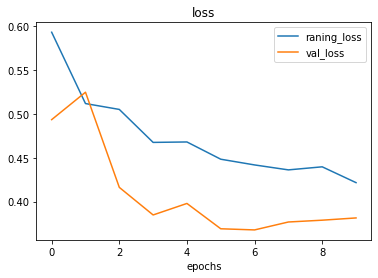

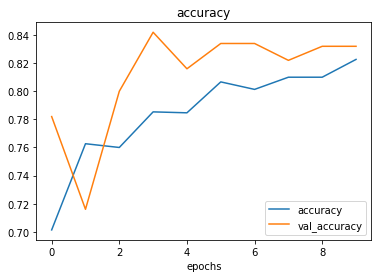

In [ ]:
plot_loss_curves(history_augmentation)

# Multi-class Image Classification


## 1. Import and Become one with the data


In [ ]:
import zipfile
import os

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()  

--2023-02-23 12:45:09--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.125.128, 142.250.136.128, 142.250.148.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.125.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   149MB/s    in 3.4s    

2023-02-23 12:45:12 (146 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [ ]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


## 2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

#batch is 32 by default
#class_mode is categorical by default 
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size= (224,224))

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size = (224,224))

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## 3. Create a model

In [ ]:
from keras.api._v2.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras import Sequential

model = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(pool_size=2),
    
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    MaxPooling2D(),

    Flatten(),
    Dense(10, activation="softmax")

])

model.compile(loss=CategoricalCrossentropy(),
              optimizer= Adam(),
              metrics=["accuracy"])

history = model.fit(train_data,
                    epochs=5,
                    steps_per_epoch = len(train_data),
                    validation_data = test_data,
                    validation_steps= len(test_data))

Epoch 1/5
235/235 [==============================] - 58s 237ms/step - loss: 2.2201 - accuracy: 0.1892 - val_loss: 2.0485 - val_accuracy: 0.2652
Epoch 2/5
235/235 [==============================] - 61s 260ms/step - loss: 1.9370 - accuracy: 0.3227 - val_loss: 2.0357 - val_accuracy: 0.2616
Epoch 3/5
235/235 [==============================] - 52s 221ms/step - loss: 1.5648 - accuracy: 0.4695 - val_loss: 2.1780 - val_accuracy: 0.2632
Epoch 4/5
235/235 [==============================] - 52s 220ms/step - loss: 0.9876 - accuracy: 0.6727 - val_loss: 2.5565 - val_accuracy: 0.2816
Epoch 5/5
235/235 [==============================] - 62s 263ms/step - loss: 0.4279 - accuracy: 0.8708 - val_loss: 3.7288 - val_accuracy: 0.2392


## 5. Evaluate the model


In [ ]:
model.evaluate(test_data)

79/79 [==============================] - 17s 217ms/step - loss: 3.7288 - accuracy: 0.2392


[3.728767156600952, 0.23919999599456787]

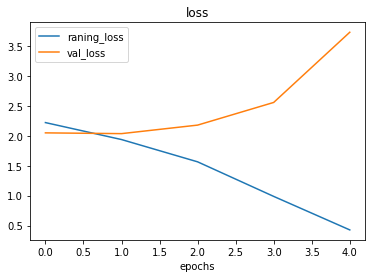

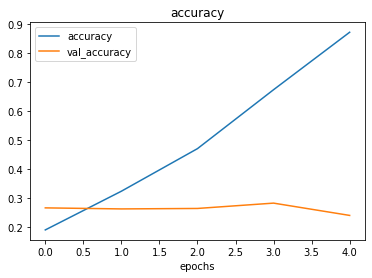

In [ ]:
plot_loss_curves(history)

## 6. Adjust the model hyperparameters (reduce Overfitting)


In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                   rotation_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_data_augmented = train_datagen.flow_from_directory(train_dir,
                                                         target_size=(224,224))

Found 7500 images belonging to 10 classes.


In [ ]:
new_model = tf.keras.models.clone_model(model)

new_model.compile(loss=CategoricalCrossentropy(),
              optimizer= Adam(),
              metrics=["accuracy"])

new_history = new_model.fit(train_data_augmented,
                            epochs=7,
                            steps_per_epoch=len(train_data_augmented),
                            validation_data = test_data,
                            validation_steps = len(test_data))

Epoch 1/7
235/235 [==============================] - 137s 575ms/step - loss: 2.1927 - accuracy: 0.1927 - val_loss: 2.0213 - val_accuracy: 0.2732
Epoch 2/7
235/235 [==============================] - 129s 547ms/step - loss: 2.0773 - accuracy: 0.2595 - val_loss: 1.9970 - val_accuracy: 0.2892
Epoch 3/7
235/235 [==============================] - 134s 571ms/step - loss: 1.9912 - accuracy: 0.2963 - val_loss: 1.8696 - val_accuracy: 0.3508
Epoch 4/7
235/235 [==============================] - 166s 706ms/step - loss: 1.9355 - accuracy: 0.3271 - val_loss: 1.8086 - val_accuracy: 0.3532
Epoch 5/7
235/235 [==============================] - 172s 731ms/step - loss: 1.8923 - accuracy: 0.3465 - val_loss: 1.7142 - val_accuracy: 0.4008
Epoch 6/7
235/235 [==============================] - 158s 673ms/step - loss: 1.8811 - accuracy: 0.3440 - val_loss: 1.6451 - val_accuracy: 0.4328
Epoch 7/7
235/235 [==============================] - 141s 602ms/step - loss: 1.8324 - accuracy: 0.3733 - val_loss: 1.6927 - val_ac

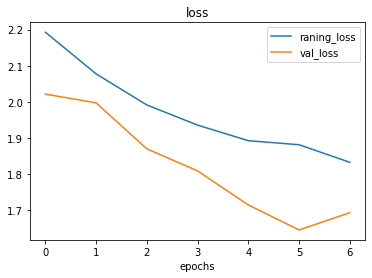

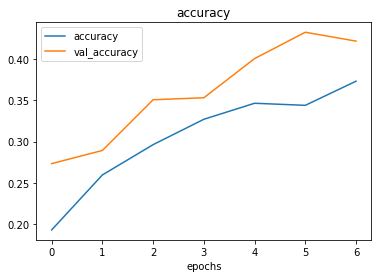

In [ ]:
plot_loss_curves(new_history)

## 7. Making a prediction with our trained model


In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg


--2023-02-23 13:48:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.07s   

2023-02-23 13:48:46 (38.0 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

--2023-02-23 13:48:46--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting

In [ ]:
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])

  img = img/255.
  return img

In [ ]:
def pred_and_plot(model, filename, class_names=class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  if len(pred[0]) > 1:
    pred_class = class_names[tf.argmax(pred[0])]
  else:
    pred_class = class_names[int(tf.round(pred))]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)

1/1 [==============================] - 0s 230ms/step


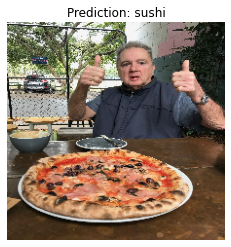

In [ ]:
pred_and_plot(new_model, filename="03-pizza-dad.jpeg", class_names=class_names)

## 8. Saving the model

In [ ]:
new_model.save("saved_trained_model")